<h1> Age of Stellar Clusters Project</h1>
<p1> Welcome! This is the Jupyer Notebook write-up for your semester-long project. Put together by Kurt Hamblin and Dr. Kevin Cooke.</p1>

<h4>General jupyter notebook keyboard-shortcurts:</h4>
<ul>
  <li>shift+enter: run selected cell, select cell below</li>
  <li>ctrl+enter: run selected cell</li>
  <li>To run all cells: 
      <ol>
          <li>Click: 'Cell'</li>
          <li>Click: 'Run All'</li>
      </ol>
  </li>
  <li>To run all cells below/above current selected cell: 
      <ol>
          <li>Click: 'Cell'</li>
          <li>Click: 'Run All Below/Above'</li>
      </ol>
  </li>
</ul>

<h4>Other General Notes</h4>
<ul>
    <li><b>Since you have to modify this notebook for your chosen clusters, we recommend you make a copy of this notebook prior to serve as an example as you modify and debug your own version.</b></li>
    <li><u>If you change one of your inputs, make sure to re-run all cells below (as per above).</u> When you change a selection, cells below will not reflect that change until they are re-run. If some weird behavior pops up try re-running all below first.</li>
    <li>If you are unsure what a piece of code is doing and feel like you need to know, you can likely find examples of it online!</li>
    <li>Remember to ask your classmates for help if you need it, especially if this is your first time using Jupyter. There's no shame in asking for help!</li>
    <li>This notebook is compatible with either Python 2 or Python 3.</li>
</ul>

<h3 align='center'>Here we load the packages we need for this project.</h3>
Note that if you get errors telling you that python can't this file, this python notebook and the 
catalog have been separated and must be in the same folder.  A workaround is to give the full path name 
for the catalog.

In [1]:
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

#Here we'll use astropy's text import capabilities to load the star catalog we were given
#For more info check out: https://docs.astropy.org/en/stable/io/ascii/index.html
data = ascii.read("cluster_cat.csv")

In [2]:
print(data)

     source_id          ra        dec     ... phot_bp_mean_mag phot_rp_mean_mag
------------------- ---------- ---------- ... ---------------- ----------------
4689624865819376896   6.008655 -72.157928 ...           17.055           16.246
4689624865837224320   6.016072  -72.15831 ...           18.168           17.287
4689624870101642752   6.010974 -72.158203 ...           17.322           16.597
4689624865819321088   5.993331 -72.164162 ...           17.406           16.594
4689624865837222272   6.010897  -72.16394 ...           18.146           17.473
4689624870101663232   6.013179 -72.161293 ...           16.927           16.112
4689624870111621760   6.016263 -72.159187 ...            16.85           15.849
4689624870111622912   6.011374 -72.159325 ...           17.507            16.76
4689624870111631360   6.010087 -72.161217 ...           18.215            17.45
4689624865837103744   6.007917 -72.159119 ...           17.445           16.675
                ...        ...        ..

That's a lot of data, so much data in fact you can see that the table has been 
compressed as "..." for both rows and columns that have been cut

We can figure out what columns we have to work with by using the following command:

In [4]:
data.columns

<TableColumns names=('source_id','ra','dec','parallax','parallax_err','phot_g_mean_mag','phot_bp_mean_mag','phot_rp_mean_mag')>

Great!  We now have learned that this table has 8 columns:
'source_id','ra','dec','parallax','parallax_err','phot_g_mean_mag','phot_bp_mean_mag','phot_rp_mean_mag'

These columns includes the coordinates (RA, DEC) that we want, as well as the magnitude for three different color bands (green, blue, red)

How do we specify a value in a column we want to work with?
As an example below, I tell python to look at the column named 'source_id', and give me the 0th element (the first entry)

In [5]:
print(data['source_id'][0]) #this should print out star number 4689624865819376896

4689624865819376896


<h2> Table Management </h2>
<p1>For those of you that are experiencing python and data structure for the first time, let's go through some examples of how to figure out what's in your data catalog in the first place. First, let's print out the table:
   

<h2> Section 1: Data Retrieval and Analysis </h2>
<p1>Your first task is to develop plots for the clusters of your choice. Remember, you need to choose <b>(1) Open Cluster</b> and also <b>(1) Globular Cluster</b>! Our first problem, and one common in astronomy, is that the catalog uses different units from your assignment.  You must calculate the decimal notation form of the RA and DEC of your cluster before we move on.  Below are the conversions neccesary.  For this example, I use NGC 3293 for my open cluster and 47 Tuc for my globular cluster.  
    
<b>CHOOSE A NEW OPEN CLUSTER CLUSTER AND GLOBULAR CLUSTER</b>, then change the below RA and DEC coordinates to your clusters of choice below: 
    

In [2]:
#CONVERTS sexigesimal format to decimal format
#STUDENT ENTERS COORDINATES OF CLUSTERS OF CHOICE HERE WITHIN THE BRACKETS

#For my open cluster example I'm using M11
#STUDENT CHOICE:
open_cluster_ra      =     18.*15 +  51./4.  + 05./240.       #hrs*15 + minutes/4 + seconds/240
open_cluster_dec     =     -  (06. +  16./60.  + 12./3600. )      # + or -  ( degrees + minutes/60 + seconds/3600 )

#For my globular example I'm using M2
#STUDENT CHOICE:
globular_cluster_ra      =     21.*15 +  33./4.  + 27.0/240.       #hrs*15 + minutes/4 + seconds/240
globular_cluster_dec     =     -  (0. +  49./60.  + 23.7/3600. )      # + or -  ( degrees + minutes/60 + seconds/3600 )

<h3>Locating Matching Stars</h3>
<p1>Now that we have the cluster centers in the same format as the list of stars, we can do some math to see how far away each star is from the centers of the clusters we choose.  Then we can set a distance limit to select the stars that only belong to one cluster.  

In [3]:
#We need to use the full formula calculating the distance between two points on a sphere

#define a function that takes the RA and DEC locations of two objects, and returns the distance between them
def distance_along_sky(raobject1, decobject1, raobject2, decobject2):
    #inputs in degrees
    #using the distance along a great circle equation from http://spiff.rit.edu/classes/phys301/lectures/precession/precession.html#sep
    #Note, cosine and sine in python use RADIANS as default units
    cosy = np.cos(  np.deg2rad(90.-decobject1) )* np.cos(  np.deg2rad(90.-decobject2)  )  +     np.sin(  np.deg2rad(90.-decobject1)  )*np.sin(  np.deg2rad(90.-decobject2))*np.cos(  np.deg2rad(raobject1-raobject2))
    angular_distance_radians= np.arccos(cosy)
    
    #outputs in radians, so let's convert back to degrees to make it easier for us later
    angular_distance_degrees=np.rad2deg(angular_distance_radians)
    
    #this function will print out one value, the distance between two points on a great circle in degrees
    return angular_distance_degrees

In [4]:
#Here I'll tell python to go down the list of RAs and DECs as pairs and use the function we defined above to
#calculate the distance for each pair to the provided cluster center

distance_from_open     = np.array([distance_along_sky(open_cluster_ra     , open_cluster_dec   ,      x,y  ) for x,y in zip(data['ra'],data['dec'])])

distance_from_globular = np.array([distance_along_sky(globular_cluster_ra ,globular_cluster_dec,      x,y  ) for x,y in zip(data['ra'],data['dec'])])

#BOTH DISTANCE ARRAYS ARE IN UNITS OF DEGREES

<h3>Selecting the Right Stars For Your Plots</h3>
<p1>Now we have a long long list of distances.  Each distance array gives you the distance of each star in the catalog from the center of either the open cluster of globular cluster you selected.  But stars on the other side of the sky from the cluster center make no sense to include, so we want to use a distance limit.  Dr. Kirkpatrick recommends that you start with 15' and adjust from there. Use what you learned in class about coordinate systems to write this out, and remember to <b>keep track of your units! </b>

<h4>Python Tutorial Time</h4>
We can ask python to provide the location of entries in a list that satisfy a given condition.

[distance_from_open < 0.25] gives a list of True/False values that say whether a given
entry has satisfied our a given condition, in this case the radial distance cutoff.  

I use that list of true/false values to only select the values from the list "distance_from_open" that satisfy this condition

"distance_from_open[distance_from_open < 0.25]" gives a list of distances for objects that satisfy our distance requirement

We can even use this for other columns since they're all the same length and a single row is always values from the same star. For example

"data['ra'][distance_from_open < 0.25]" gives a list of Right Ascensions for objects that satisfy our distance requirement

In [5]:
#Let's run a quick sanity check and ask python to print the length of the list of stars 
#that satisfy our cutoff of 15 arcmin (aka 0.15 degrees)

#This should result in a few thousand matches but change depending on your choice of cluster
print('Number of stellar matches for Open Cluster Choice: ',len(distance_from_open[distance_from_open < 0.25]))
print('Number of stellar matches for Globular Cluster Choice: ',len(distance_from_globular[distance_from_globular < 0.25]))

Number of stellar matches for Open Cluster Choice:  3066
Number of stellar matches for Globular Cluster Choice:  1258


<h2>Cluster Plots</h2>
<p1>Now we know whether each star is in either cluster, so we can go ahead and make plots of the stars in each cluster within the threshold distance you set.</p1>


 <h3>Open Cluster Plot</h3>
 
 Let's fulfill our original goal of making a color color plot of a given cluster using the stars we just learned how to find!

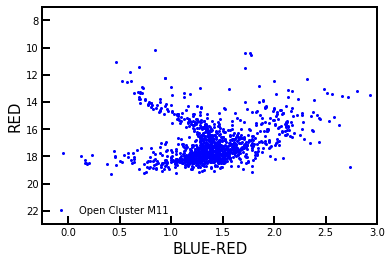

In [6]:
#Let's figure out the arrays we need for our x and y axes

#We know from the assignment directions that the x axis is a color difference (blue - red)
#We also know the y axis is only the brightness in the red band, that's easier so let's start there

#STUDENT CUSTOMIZES THE CLUSTER RADIUS HERE
cutoff_radius=0.15 #degrees
open_y_red=data['phot_rp_mean_mag'][distance_from_open < cutoff_radius]
open_x_bmr=data['phot_bp_mean_mag'][distance_from_open < cutoff_radius]-data['phot_rp_mean_mag'][distance_from_open < cutoff_radius]


#Next we start a plot object onto which python will generate the plot we can view
fig = plt.figure()
ax = fig.add_subplot(111)


#Plot the color and magnitude values here!  Make sure to change the points label to be your chosen cluster
plt.plot(open_x_bmr,open_y_red,'bo',markersize=2,label='Open Cluster M11')


#Astronomy is weird, so here I set y axis to be inverted by making the lower y bound higher than the upper y bound.
#Answer why in question 1.3!
plt.axis([-0.25, 3,23, 7])

#Whole bunch of formatting lines below to make things look nicer, use for your own plots in other works!
plt.legend(loc=3,prop={'size':10},frameon=False)
plt.setp(ax.spines.values(), linewidth=2) #Set's outer border thickness
ax.get_yaxis().set_tick_params(which='both',direction='in') #Sets the tick marks to face inwards
ax.get_xaxis().set_tick_params(which='both',direction='in')
plt.xlabel('BLUE-RED',fontsize=15)
plt.ylabel('RED',fontsize=15)
plt.tick_params(which='major', length=8, width=2) #Customize the size of tick marks
plt.tick_params(which='minor', length=3, width=2)

#Next we want to see the plot we made
plt.show()
#fig.savefig('open_cluster_color_mag_diagram.pdf', dpi=800)  #Take away the first # at the beginning of this line to save as a pdf!
plt.close()

 <h3>Globular Cluster Plot</h3>

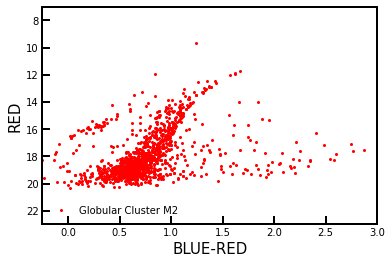

In [7]:
#Let's figure out the arrays we need for our x and y axes

#We know from the assignment directions that the x axis is a color difference (blue - red)
#We also know the x axis is only the brightness in the red band, that's easier so let's start there

#STUDENT CUSTOMIZES THE CLUSTER RADIUS HERE
cutoff_radius=0.25 #degrees
globular_y_red=data['phot_rp_mean_mag'][distance_from_globular < cutoff_radius]
globular_x_bmr=data['phot_bp_mean_mag'][distance_from_globular < cutoff_radius]-data['phot_rp_mean_mag'][distance_from_globular < cutoff_radius]


fig = plt.figure()
ax = fig.add_subplot(111)

#Plot the color and magnitude values here!  Make sure to change the points label to be your chosen cluster
plt.plot(globular_x_bmr,globular_y_red,'ro',markersize=2,label='Globular Cluster M2')

#Astronomy is weird, so here I set y axis to be inverted by making the lower y bound higher than the upper y bound.
#Answer why in question 1.3!
plt.axis([-0.25, 3,23, 7])

#Whole bunch of formatting lines below to make things look nicer, use for your own plots in other works!
plt.legend(loc=3,prop={'size':10},frameon=False)
plt.setp(ax.spines.values(), linewidth=2) #Set's outer border thickness
ax.get_yaxis().set_tick_params(which='both',direction='in') #Sets the tick marks to face inwards
ax.get_xaxis().set_tick_params(which='both',direction='in')
plt.xlabel('BLUE-RED',fontsize=15)
plt.ylabel('RED',fontsize=15)
plt.tick_params(which='major', length=8, width=2) #Customize the size of tick marks
plt.tick_params(which='minor', length=3, width=2)


#Next we want to see the plot we made
plt.show()
#fig.savefig('globular_cluster_color_mag_diagram.pdf', dpi=800)  #Take away the first # at the beginning of this line to save as a pdf!
plt.close()

 <h1>Section 2: Estimating ages using our plots</h1>

Now, with our general plots made, we will begin our work into fitting these plots with isochrones to determine the cluster age. First, we must convert our y-axis to be the absolute magnitude in the G_RP band. Write a function for this below:

In [8]:
#Write a function to return the absolute magnitude of a star knowing its apparent magnitude, m, and its distance, d, in pc
#Inputs: apparent magnitude, distance in pc
def absolute_M(m, dist):
    M = m - 5*np.log10(dist/10)
    return M

In the following code cell, we load in the isochrone file. The isochrone file formatting requires some careful iteration
 in order to assemble the actual lines of isochrones on the plots soon to come, but that is all handled here.

Isochrone file format: CAREFUL ABOUT numbered column names versus the index of that column.  Example: col1 is the 0th column
- col1: logAge [Gyr]
- col2: stellar mass [M star]
- col3: Luminosity
- col4: Temperature
- col5: G
- col6: G_BP
- col7: G_RP

In [9]:
isochrones = np.loadtxt("isochrones.txt")

#This file has several color-magnitude trends for different aged stellar populations, one after another.  
#Let's get our bearings by recovering the set of ages that we'll be trying to match to our earlier plots
ages=isochrones[:,0]
age_list = np.unique(isochrones[:,0]) #This will give us a way to keep track of the isochrone ages, using the first (0th) column
iso_labels = [str(age)+' Gyr' for age in age_list   ]  #Ages for each labels to help us later
print(age_list, 'Gyr Isochrones Available')

#We can also get the color and magnitude information we need
iso_GRP = isochrones[:,6] #our "y-values",  red brightness in absolute magnitudes
iso_GBP_GRP = isochrones[:,5]-isochrones[:,6] #our "x_values" blue - red

[ 7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3  8.4  8.5  8.6  8.7  8.8
  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7  9.8  9.9 10. ] Gyr Isochrones Available


<p1>Now, using the function you wrote for the absolute magnitude, we will convert our previous plots to display this, and we will also overlay the isochrones which we will later fit.</p1>

<h3>Open Cluster: Absolute Magnitude</h3> 
<p1><i>Let's replot our clusters, but using absolute magnitudes for the brightness we plot on the y-axis.  This will enable us to plot both our cluster stars and the isochrones on the same scale.</i>


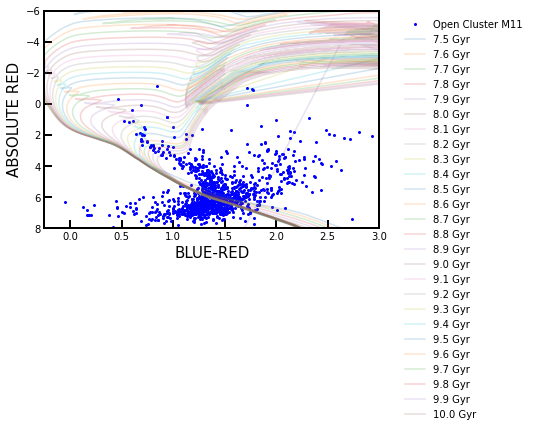

In [10]:
#We want to plot all the isochrones as indepent lines on our absolute magnitude plots
#STUDENT CUSTOMIZES THE CLUSTER CHOICE DISTANCE HERE
open_cluster_distance=1900 #pc


#Let's figure out the arrays we need for our x and y axes
#We know from the assignment directions that the x axis is a color difference (blue - red)
#We also know the y axis is only the brightness in the red band, that's easier so let's start there

#STUDENT CUSTOMIZES THE CLUSTER RADIUS HERE
cutoff_radius=0.15 #degrees
open_y_red=data['phot_rp_mean_mag'][distance_from_open < cutoff_radius]
open_x_bmr=data['phot_bp_mean_mag'][distance_from_open < cutoff_radius]-data['phot_rp_mean_mag'][distance_from_open < cutoff_radius]

#Convert y axis values to absolute magnitudes
abs_open_y_red=[absolute_M(x,open_cluster_distance) for x in open_y_red]

fig = plt.figure()
ax = fig.add_subplot(111)

#Plot the color and magnitude values here!  Make sure to change the points label to be your chosen cluster
plt.plot(open_x_bmr,abs_open_y_red,'bo',markersize=2,label='Open Cluster M11')

#For each diffrently aged line:
for i in range(len(age_list)):
    #plot the lines corresponding the red absolute magntiude and blue-red color differences of each individually aged isochrone
    plt.plot(iso_GBP_GRP[ages == age_list[i]],iso_GRP[ages == age_list[i]],marker='',linestyle='-',label=str(age_list[i])+' Gyr',alpha=0.2) #alpha controls the opacity of the lines


#Astronomy is weird, so here I set y axis to be inverted.  Answer this in question 1.3!
plt.axis([-0.25, 3,  8, -6])

#Whole bunch of formatting lines below to make things look nicer, use for your own plots in other works!
plt.legend(loc=2,prop={'size':10},frameon=False, bbox_to_anchor=(1.05, 1))
plt.setp(ax.spines.values(), linewidth=2) #Set's outer border thickness
ax.get_yaxis().set_tick_params(which='both',direction='in') #Sets the tick marks to face inwards
ax.get_xaxis().set_tick_params(which='both',direction='in')
plt.xlabel('BLUE-RED',fontsize=15)
plt.ylabel('ABSOLUTE RED',fontsize=15)
plt.tick_params(which='major', length=8, width=2) #Customize the size of tick marks
plt.tick_params(which='minor', length=3, width=2)

#Next we want to see the plot we made
plt.show()
#fig.savefig('isochrone_abs_open_cluster_color_mag_diagram.pdf', dpi=800)  #Take away the first # at the beginning of this line to save as a pdf!
plt.close()

<h3>Globular Cluster: Absolute Magnitude</h3>
<p1><i>Let's replot our clusters, but using absolute magnitudes for the brightness we plot on the y-axis.  This will enable us to plot both our cluster stars and the isochrones on the same scale.</i>

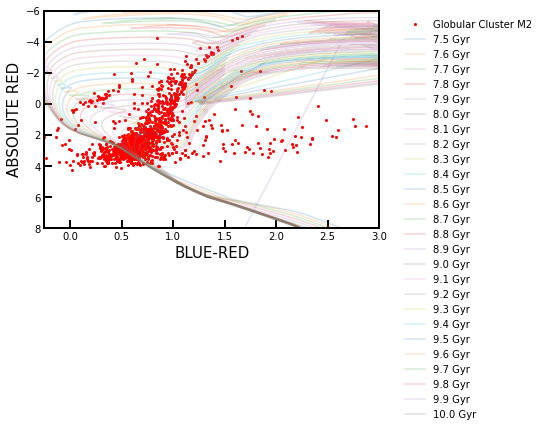

In [11]:
#Let's figure out the arrays we need for our x and y axes
#STUDENT CUSTOMIZES THE CLUSTER CHOICE DISTANCE HERE
globular_cluster_distance=16863 #pc

#We know from the assignment directions that the x axis is a color difference (blue - red)
#We also know the x axis is only the brightness in the red band, that's easier so let's start there

#STUDENT CUSTOMIZES THE CLUSTER RADIUS HERE
cutoff_radius=0.25 #degrees
globular_y_red=data['phot_rp_mean_mag'][distance_from_globular < cutoff_radius]
globular_x_bmr=data['phot_bp_mean_mag'][distance_from_globular < cutoff_radius]-data['phot_rp_mean_mag'][distance_from_globular < cutoff_radius]

#Convert y axis values to absolute magnitudes
abs_globular_y_red=[absolute_M(x,globular_cluster_distance) for x in globular_y_red]

fig = plt.figure()
ax = fig.add_subplot(111)

#Plot the color and magnitude values here!  Make sure to change the points label to be your chosen cluster
plt.plot(globular_x_bmr,abs_globular_y_red,'ro',markersize=2,label='Globular Cluster M2')

#For each diffrently aged line:
for i in range(len(age_list)):
    #plot the lines corresponding the red absolute magntiude and blue-red color differences of each individually aged isochrone
    plt.plot(iso_GBP_GRP[ages == age_list[i]],iso_GRP[ages == age_list[i]],marker='',linestyle='-',label=str(age_list[i])+' Gyr', alpha=0.2)  #alpha controls the opacity of the lines


#Astronomy is weird, so here I set y axis to be inverted.  Answer this in question 1.3!
plt.axis([-0.25, 3,8, -6])

#Whole bunch of formatting lines below to make things look nicer, use for your own plots in other works!
plt.legend(loc=2,prop={'size':10},frameon=False, bbox_to_anchor=(1.05, 1))
plt.setp(ax.spines.values(), linewidth=2) #Set's outer border thickness
ax.get_yaxis().set_tick_params(which='both',direction='in') #Sets the tick marks to face inwards
ax.get_xaxis().set_tick_params(which='both',direction='in')
plt.xlabel('BLUE-RED',fontsize=15)
plt.ylabel('ABSOLUTE RED',fontsize=15)
plt.tick_params(which='major', length=8, width=2) #Customize the size of tick marks
plt.tick_params(which='minor', length=3, width=2)

#Next we want to see the plot we made
plt.show()
#fig.savefig('globular_cluster_color_mag_diagram.pdf', dpi=800)  #Take away the first # at the beginning of this line to save as a pdf!
plt.close()

<h2>Final Sample Trimming: Parallax</h2>
<p1>You will now perform one more sample cut on your clusters by using Parallax. Adjust the parallax thresholds below until you are confident that all the stars displayed are actually in your clusters. Note that these thresholds are in pc.</p1>

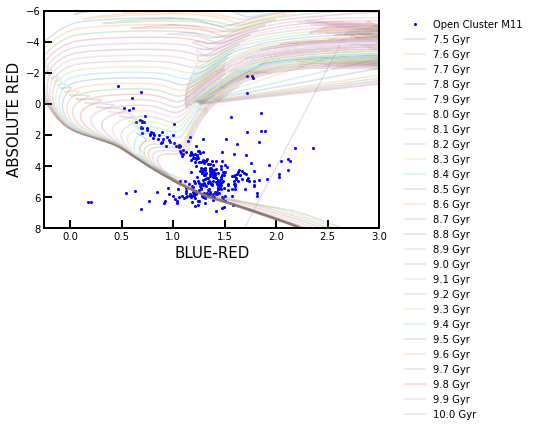

In [12]:
#Now we modify our original selection to use more than one criteria to selection stars, this time adding parallax
#This changes the format to require each condition to use () and the symbol & to combine conditions


#Let's figure out the arrays we need for our x and y axes
#We know from the assignment directions that the x axis is a color difference (blue - red)
#We also know the y axis is only the brightness in the red band, that's easier so let's start there

#STUDENT CUSTOMIZES CLUSTER RADIUS HERE
cutoff_radius=0.15 #degrees

#STUDENT CUSTOMIZES PARALLAX RANGE HERE
# M11 has a distance of 1900 pc --> p = 1/d = 1/1900 = 0.0005 as = 0.5 mas
# I am assuming that the parallaxes below are in mas
lower_cutoff_parallax=0.3
upper_cutoff_parallax=0.7


open_y_red=data['phot_rp_mean_mag'][(distance_from_open < cutoff_radius) & (data['parallax'] > lower_cutoff_parallax) & (data['parallax'] < upper_cutoff_parallax)]
open_x_bmr=data['phot_bp_mean_mag'][(distance_from_open < cutoff_radius) & (data['parallax'] > lower_cutoff_parallax) & (data['parallax'] < upper_cutoff_parallax)]-data['phot_rp_mean_mag'][(distance_from_open < cutoff_radius) & (data['parallax'] > lower_cutoff_parallax) & (data['parallax'] < upper_cutoff_parallax)]

#STUDENT CUSTOMIZES CLUSTER DISTANCE HERE
open_cluster_distance=2750 #pc
abs_open_y_red=[absolute_M(x,open_cluster_distance) for x in open_y_red]

fig = plt.figure()
ax = fig.add_subplot(111)

#Plot the color and magnitude values here!  Make sure to change the points label to be your chosen cluster
plt.plot(open_x_bmr,abs_open_y_red,'bo',markersize=2,label='Open Cluster M11')

#For each diffrently aged line:
for i in range(len(age_list)):
    #plot the lines corresponding the red absolute magntiude and blue-red color differences of each individually aged isochrone
    plt.plot(iso_GBP_GRP[ages == age_list[i]],iso_GRP[ages == age_list[i]],marker='',linestyle='-',label=str(age_list[i])+' Gyr',alpha=0.2)


#Astronomy is weird, so here I set y axis to be inverted.  Answer this in question 1.3!
plt.axis([-0.25, 3,8, -6])

#Whole bunch of formatting lines below to make things look nicer, use for your own plots in other works!
plt.legend(loc=2,prop={'size':10},frameon=False, bbox_to_anchor=(1.05, 1))
plt.setp(ax.spines.values(), linewidth=2) #Set's outer border thickness
ax.get_yaxis().set_tick_params(which='both',direction='in') #Sets the tick marks to face inwards
ax.get_xaxis().set_tick_params(which='both',direction='in')
plt.xlabel('BLUE-RED',fontsize=15)
plt.ylabel('ABSOLUTE RED',fontsize=15)
plt.tick_params(which='major', length=8, width=2) #Customize the size of tick marks
plt.tick_params(which='minor', length=3, width=2)

#Next we want to see the plot we made
plt.show()
#fig.savefig('parallax_isochrone_abs_open_cluster_color_mag_diagram.pdf', dpi=800)  #Take away the first # at the beginning of this line to save as a pdf!
plt.close()

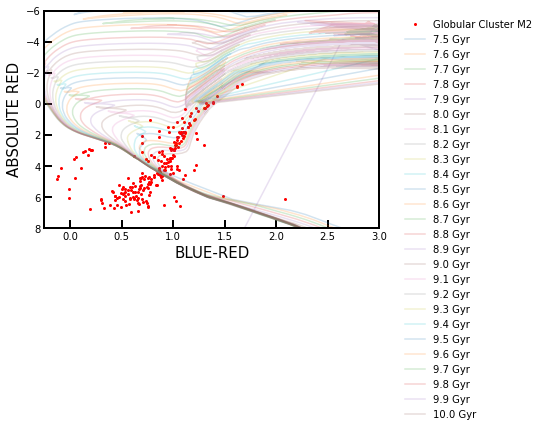

In [13]:
#Let's figure out the arrays we need for our x and y axes

#We know from the assignment directions that the x axis is a color difference (blue - red)
#We also know the x axis is only the brightness in the red band, that's easier so let's start there





#STUDENT CUSTOMIZES CLUSTER RADIUS HERE
cutoff_radius=0.25 #degrees

#STUDENT CUSTOMIZES CLUSTER PARALLAX RANGE HERE
# the distance to M2 is 16863 pc --> p = 1/d = 1/16863 = 0.00006 as = 0.1 mas
lower_cutoff_parallax=0.0001
upper_cutoff_parallax=0.3


globular_y_red=data['phot_rp_mean_mag'][(distance_from_globular < cutoff_radius) & (data['parallax'] > lower_cutoff_parallax) & (data['parallax'] < upper_cutoff_parallax)]
globular_x_bmr=data['phot_bp_mean_mag'][(distance_from_globular < cutoff_radius) & (data['parallax'] > lower_cutoff_parallax) & (data['parallax'] < upper_cutoff_parallax)]-data['phot_rp_mean_mag'][(distance_from_globular < cutoff_radius) & (data['parallax'] > lower_cutoff_parallax) & (data['parallax'] < upper_cutoff_parallax)]

#STUDENT CUSTOMIZES CLUSTER DISTANCE HERE
globular_cluster_distance=4001 #pc
abs_globular_y_red=[absolute_M(x,globular_cluster_distance) for x in globular_y_red]

fig = plt.figure()
ax = fig.add_subplot(111)

#Plot the color and magnitude values here!  Make sure to change the points label to be your chosen cluster
plt.plot(globular_x_bmr,abs_globular_y_red,'ro',markersize=2,label='Globular Cluster M2')

#For each diffrently aged line:
for i in range(len(age_list)):
    #plot the lines corresponding the red absolute magntiude and blue-red color differences of each individually aged isochrone
    plt.plot(iso_GBP_GRP[ages == age_list[i]],iso_GRP[ages == age_list[i]],marker='',linestyle='-',label=str(age_list[i])+' Gyr',alpha=0.2)


#Astronomy is weird, so here I set y axis to be inverted.  Answer this in question 1.3!
plt.axis([-0.25, 3,8, -6])

#Whole bunch of formatting lines below to make things look nicer, use for your own plots in other works!
plt.legend(loc=2,prop={'size':10},frameon=False, bbox_to_anchor=(1.05, 1))
plt.setp(ax.spines.values(), linewidth=2) #Set's outer border thickness
ax.get_yaxis().set_tick_params(which='both',direction='in') #Sets the tick marks to face inwards
ax.get_xaxis().set_tick_params(which='both',direction='in')
plt.xlabel('BLUE-RED',fontsize=15)
plt.ylabel('ABSOLUTE RED',fontsize=15)
plt.tick_params(which='major', length=8, width=2) #Customize the size of tick marks
plt.tick_params(which='minor', length=3, width=2)

#Next we want to see the plot we made
plt.show()
#fig.savefig('parallax_globular_cluster_color_mag_diagram.pdf', dpi=800)  #Take away the first # at the beginning of this line to save as a pdf!
plt.close()

<h2>Reddening</h2>
<p1>Now, you must correct for reddening in the plots above. Reddening decreases the brightness in the blue bands (making the blue color more positive.  Correcting for reddening will move the points to the left, towards a bluer color.</p1>

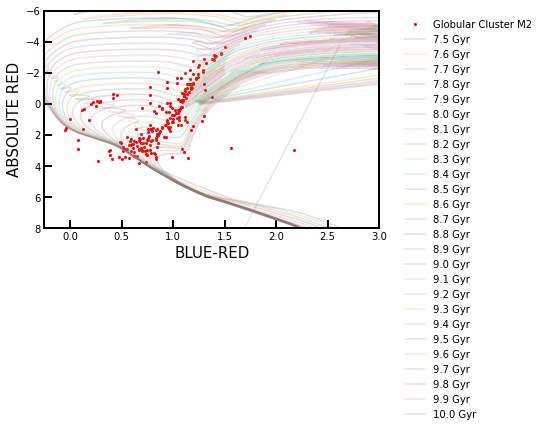

In [14]:
#Let's figure out the arrays we need for our x and y axes

#We know from the assignment directions that the x axis is a color difference (blue - red)
#We also know the x axis is only the brightness in the red band, that's easier so let's start there





#STUDENT CUSTOMIZES CLUSTER RADIUS HERE
cutoff_radius=0.25 #degrees

#STUDENT CUSTOMIZES CLUSTER PARALLAX RANGE HERE
lower_cutoff_parallax=0.0001
upper_cutoff_parallax=0.3

globular_y_red=data['phot_rp_mean_mag'][(distance_from_globular < cutoff_radius) & (data['parallax'] > lower_cutoff_parallax) & (data['parallax'] < upper_cutoff_parallax)]
globular_x_bmr=data['phot_bp_mean_mag'][(distance_from_globular < cutoff_radius) & (data['parallax'] > lower_cutoff_parallax) & (data['parallax'] < upper_cutoff_parallax)]-data['phot_rp_mean_mag'][(distance_from_globular < cutoff_radius) & (data['parallax'] > lower_cutoff_parallax) & (data['parallax'] < upper_cutoff_parallax)]


#Reddening will affect our color estimate (x-axis) because reddening will remove light as a function of wavelength
#here I experiment with a reddening value and add it to the color difference points we just found

#STUDENT CUSTOMIZES CLUSTER REDDENING HERE
ext_blue_red=-0.08
dereddened_globular_x_bmr=[x-ext_blue_red for x in globular_x_bmr] #We subtract to make the colors more negative, aka blue-er, replacing the lost blue light

#STUDENT CUSTOMIZES CLUSTER DISTANCE HERE
globular_cluster_distance=16863 #pc
abs_globular_y_red=[absolute_M(x,globular_cluster_distance) for x in globular_y_red]

fig = plt.figure()
ax = fig.add_subplot(111)

#Plot the color and magnitude values here!  Make sure to change the points label to be your chosen cluster
plt.plot(dereddened_globular_x_bmr,abs_globular_y_red,'ro',markersize=2,label='Globular Cluster M2')

#For each diffrently aged line:
for i in range(len(age_list)):
    #plot the lines corresponding the red absolute magntiude and blue-red color differences of each individually aged isochrone
    plt.plot(iso_GBP_GRP[ages == age_list[i]],iso_GRP[ages == age_list[i]],marker='',linestyle='-',label=str(age_list[i])+' Gyr',alpha=0.2)


#Astronomy is weird, so here I set y axis to be inverted.  Answer this in question 1.3!
plt.axis([-0.25, 3,8, -6])

#Whole bunch of formatting lines below to make things look nicer, use for your own plots in other works!
plt.legend(loc=2,prop={'size':10},frameon=False, bbox_to_anchor=(1.05, 1))
plt.setp(ax.spines.values(), linewidth=2) #Set's outer border thickness
ax.get_yaxis().set_tick_params(which='both',direction='in') #Sets the tick marks to face inwards
ax.get_xaxis().set_tick_params(which='both',direction='in')
plt.xlabel('BLUE-RED',fontsize=15)
plt.ylabel('ABSOLUTE RED',fontsize=15)
plt.tick_params(which='major', length=8, width=2) #Customize the size of tick marks
plt.tick_params(which='minor', length=3, width=2)

#Next we want to see the plot we made
plt.show()
#fig.savefig('dereddened_parallax_globular_cluster_color_mag_diagram.pdf', dpi=800)  #Take away the first # at the beginning of this line to save as a pdf!
plt.close()

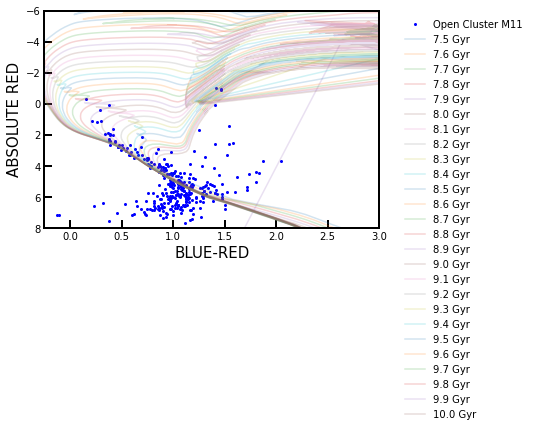

In [43]:
#Now we modify our original selection to use more than one criteria to selection stars, this time adding parallax
#This changes the format to require each condition to use () and the symbol & to combine conditions


#Let's figure out the arrays we need for our x and y axes
#We know from the assignment directions that the x axis is a color difference (blue - red)
#We also know the y axis is only the brightness in the red band, that's easier so let's start there

#STUDENT CUSTOMIZES CLUSTER RADIUS HERE
cutoff_radius=0.15 #degrees

#STUDENT CUSTOMIZES CLUSTER PARALLAX HERE
lower_cutoff_parallax=0.3
upper_cutoff_parallax=0.7

open_y_red=data['phot_rp_mean_mag'][(distance_from_open < cutoff_radius) & (data['parallax'] > lower_cutoff_parallax) & (data['parallax'] < upper_cutoff_parallax)]
open_x_bmr=data['phot_bp_mean_mag'][(distance_from_open < cutoff_radius) & (data['parallax'] > lower_cutoff_parallax) & (data['parallax'] < upper_cutoff_parallax)]-data['phot_rp_mean_mag'][(distance_from_open < cutoff_radius) & (data['parallax'] > lower_cutoff_parallax) & (data['parallax'] < upper_cutoff_parallax)]



#Reddening will affect our color estimate (x-axis) because reddening will remove light as a function of wavelength
#here I experiment with a reddening value and add it to the color difference points we just found

#STUDENT CUSTOMIZES CLUSTER REDDENING HERE
ext_blue_red=0.31
dereddened_open_x_bmr=[x-ext_blue_red for x in open_x_bmr] #We subtract to make the colors more negative, aka blue-er, replacing the lost blue light



#STUDENT CUSTOMIZES CLUSTER DISTANCE HERE
open_cluster_distance=1900 #pc
abs_open_y_red=[absolute_M(x,open_cluster_distance) for x in open_y_red]

fig = plt.figure()
ax = fig.add_subplot(111)

#Plot the color and magnitude values here!  Make sure to change the points label to be your chosen cluster
plt.plot(dereddened_open_x_bmr,abs_open_y_red,'bo',markersize=2,label='Open Cluster M11')

#For each diffrently aged line:
for i in range(len(age_list)):
    #plot the lines corresponding the red absolute magntiude and blue-red color differences of each individually aged isochrone
    plt.plot(iso_GBP_GRP[ages == age_list[i]],iso_GRP[ages == age_list[i]],marker='',linestyle='-',label=str(age_list[i])+' Gyr',alpha=0.2)


#Astronomy is weird, so here I set y axis to be inverted.  Answer this in question 1.3!
plt.axis([-0.25, 3,8, -6])

#Whole bunch of formatting lines below to make things look nicer, use for your own plots in other works!
plt.legend(loc=2,prop={'size':10},frameon=False, bbox_to_anchor=(1.05, 1))
plt.setp(ax.spines.values(), linewidth=2) #Set's outer border thickness
ax.get_yaxis().set_tick_params(which='both',direction='in') #Sets the tick marks to face inwards
ax.get_xaxis().set_tick_params(which='both',direction='in')
plt.xlabel('BLUE-RED',fontsize=15)
plt.ylabel('ABSOLUTE RED',fontsize=15)
plt.tick_params(which='major', length=8, width=2) #Customize the size of tick marks
plt.tick_params(which='minor', length=3, width=2)

#Next we want to see the plot we made
plt.show()
#fig.savefig('dereddened_parallax_isochrone_abs_open_cluster_color_mag_diagram.pdf', dpi=800)  #Take away the first # at the beginning of this line to save as a pdf!
plt.close()


<h3> Final Plots </h3>
<p1>Now you will make your final plots which will contain only the best-fit isochrone that you choose.</p1>

<ul>
    <li><b>You must make two plots (one for each cluster choice) by using the code snippets above to plot the cluster members for your open and globular clusters with ONLY the best fit isochrone for each</b></li>
    <li>Look at your plots above that include all the available isochrones choices, and learn how to specify only a specific isochrone line to plot</li>
    <li>If you are unsure what a piece of code is doing and feel like you need to know, you can likely find examples of it online!</li>
    <li>Remember to ask your classmates for help if you need it, especially if this is your first time using Jupyter. There's no shame in asking for help!</li>
</ul>

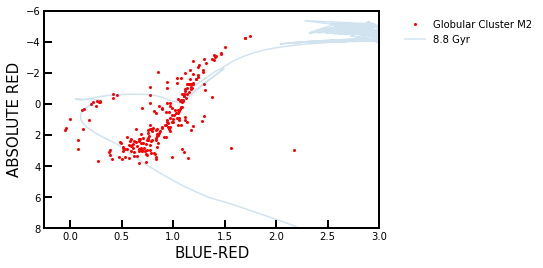

In [38]:
#STUDENT FINAL PLOTS GO HERE, GOOD LUCK!


# Globular Cluster M2

#STUDENT CUSTOMIZES CLUSTER RADIUS HERE
cutoff_radius=0.25 #degrees

#STUDENT CUSTOMIZES CLUSTER PARALLAX RANGE HERE
lower_cutoff_parallax=0.0001
upper_cutoff_parallax=0.3

globular_y_red=data['phot_rp_mean_mag'][(distance_from_globular < cutoff_radius) & (data['parallax'] > lower_cutoff_parallax) & (data['parallax'] < upper_cutoff_parallax)]
globular_x_bmr=data['phot_bp_mean_mag'][(distance_from_globular < cutoff_radius) & (data['parallax'] > lower_cutoff_parallax) & (data['parallax'] < upper_cutoff_parallax)]-data['phot_rp_mean_mag'][(distance_from_globular < cutoff_radius) & (data['parallax'] > lower_cutoff_parallax) & (data['parallax'] < upper_cutoff_parallax)]


#Reddening will affect our color estimate (x-axis) because reddening will remove light as a function of wavelength
#here I experiment with a reddening value and add it to the color difference points we just found

#STUDENT CUSTOMIZES CLUSTER REDDENING HERE
ext_blue_red=-0.08
dereddened_globular_x_bmr=[x-ext_blue_red for x in globular_x_bmr] #We subtract to make the colors more negative, aka blue-er, replacing the lost blue light

#STUDENT CUSTOMIZES CLUSTER DISTANCE HERE
globular_cluster_distance=16863 #pc
abs_globular_y_red=[absolute_M(x,globular_cluster_distance) for x in globular_y_red]

fig = plt.figure()
ax = fig.add_subplot(111)

#Plot the color and magnitude values here!  Make sure to change the points label to be your chosen cluster
plt.plot(dereddened_globular_x_bmr,abs_globular_y_red,'ro',markersize=2,label='Globular Cluster M2')

#Plot select isochrones 
#i=8;
#plt.plot(iso_GBP_GRP[ages == age_list[i]],iso_GRP[ages == age_list[i]],marker='',linestyle='-',label=str(age_list[i])+' Gyr',alpha=0.2)
i=13;
plt.plot(iso_GBP_GRP[ages == age_list[i]],iso_GRP[ages == age_list[i]],marker='',linestyle='-',label=str(age_list[i])+' Gyr',alpha=0.2)
#i=19;
#plt.plot(iso_GBP_GRP[ages == age_list[i]],iso_GRP[ages == age_list[i]],marker='',linestyle='-',label=str(age_list[i])+' Gyr',alpha=0.2)
#i=24;

#Astronomy is weird, so here I set y axis to be inverted.  Answer this in question 1.3!
plt.axis([-0.25, 3,8, -6])

#Whole bunch of formatting lines below to make things look nicer, use for your own plots in other works!
plt.legend(loc=2,prop={'size':10},frameon=False, bbox_to_anchor=(1.05, 1))
plt.setp(ax.spines.values(), linewidth=2) #Set's outer border thickness
ax.get_yaxis().set_tick_params(which='both',direction='in') #Sets the tick marks to face inwards
ax.get_xaxis().set_tick_params(which='both',direction='in')
plt.xlabel('BLUE-RED',fontsize=15)
plt.ylabel('ABSOLUTE RED',fontsize=15)
plt.tick_params(which='major', length=8, width=2) #Customize the size of tick marks
plt.tick_params(which='minor', length=3, width=2)

#Next we want to see the plot we made
plt.show()
#fig.savefig('dereddened_parallax_globular_cluster_color_mag_diagram.pdf', dpi=800)  #Take away the first # at the beginning of this line to save as a pdf!
plt.close()

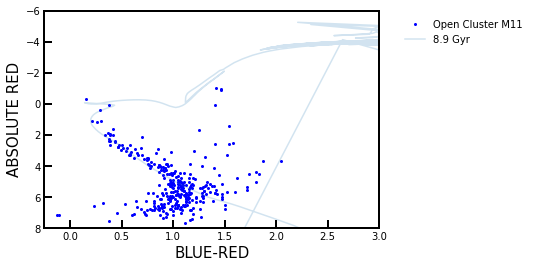

In [44]:
#Open Cluster: M11


#STUDENT CUSTOMIZES CLUSTER RADIUS HERE
cutoff_radius=0.15 #degrees

#STUDENT CUSTOMIZES CLUSTER PARALLAX HERE
lower_cutoff_parallax=0.3
upper_cutoff_parallax=0.7

open_y_red=data['phot_rp_mean_mag'][(distance_from_open < cutoff_radius) & (data['parallax'] > lower_cutoff_parallax) & (data['parallax'] < upper_cutoff_parallax)]
open_x_bmr=data['phot_bp_mean_mag'][(distance_from_open < cutoff_radius) & (data['parallax'] > lower_cutoff_parallax) & (data['parallax'] < upper_cutoff_parallax)]-data['phot_rp_mean_mag'][(distance_from_open < cutoff_radius) & (data['parallax'] > lower_cutoff_parallax) & (data['parallax'] < upper_cutoff_parallax)]


#Reddening will affect our color estimate (x-axis) because reddening will remove light as a function of wavelength
#here I experiment with a reddening value and add it to the color difference points we just found

#STUDENT CUSTOMIZES CLUSTER REDDENING HERE
ext_blue_red=0.31
dereddened_open_x_bmr=[x-ext_blue_red for x in open_x_bmr] #We subtract to make the colors more negative, aka blue-er, replacing the lost blue light


#STUDENT CUSTOMIZES CLUSTER DISTANCE HERE
open_cluster_distance=1900 #pc
abs_open_y_red=[absolute_M(x,open_cluster_distance) for x in open_y_red]

fig = plt.figure()
ax = fig.add_subplot(111)

#Plot the color and magnitude values here!  Make sure to change the points label to be your chosen cluster
plt.plot(dereddened_open_x_bmr,abs_open_y_red,'bo',markersize=2,label='Open Cluster M11')

i=14
plt.plot(iso_GBP_GRP[ages == age_list[i]],iso_GRP[ages == age_list[i]],marker='',linestyle='-',label=str(age_list[i])+' Gyr',alpha=0.2)
    
    
#Astronomy is weird, so here I set y axis to be inverted.  Answer this in question 1.3!
plt.axis([-0.25, 3,8, -6])

#Whole bunch of formatting lines below to make things look nicer, use for your own plots in other works!
plt.legend(loc=2,prop={'size':10},frameon=False, bbox_to_anchor=(1.05, 1))
plt.setp(ax.spines.values(), linewidth=2) #Set's outer border thickness
ax.get_yaxis().set_tick_params(which='both',direction='in') #Sets the tick marks to face inwards
ax.get_xaxis().set_tick_params(which='both',direction='in')
plt.xlabel('BLUE-RED',fontsize=15)
plt.ylabel('ABSOLUTE RED',fontsize=15)
plt.tick_params(which='major', length=8, width=2) #Customize the size of tick marks
plt.tick_params(which='minor', length=3, width=2)

#Next we want to see the plot we made
plt.show()
#fig.savefig('dereddened_parallax_isochrone_abs_open_cluster_color_mag_diagram.pdf', dpi=800)  #Take away the first # at the beginning of this line to save as a pdf!
plt.close()
